In [1]:
# !mamba install -c conda-forge geopandas
# !mamba install -c conda-forge geopandas fiona gdal pyogrio

In [1]:
from helpers.locations import *
from helpers.drugs import *
from helpers.dates import *
from helpers.population import CountyNormalizer
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
state = "Colorado"
legalisation_date = "2014-01-01"

county_normalizer = CountyNormalizer()

# df_drug = pd.read_csv("data/drugs/US_Oxycodone.csv")
DRUG_NAMES = ["US_Amphetamine", "US_Codeine", "US_Hydrocodone", "US_Morphine", "US_Oxycodone"]
df_drug = get_drugs_dfs(DRUG_NAMES)
df_drug = df_drug.generate_state_column("placeDcid")
df_drug = df_drug.generate_year()
df_drug['FIPS'] = df_drug['placeDcid'].str.split('/').str[-1]
df_drug["population"] = df_drug.apply(county_normalizer.get_population, axis=1)
df_drug.dropna(inplace= True)
df_drug

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
0,geoId/01001,Autauga County,2006-01,301.62,456.09,1484.79,472.42,720.13,Alabama,2006,01001,49105.0
1,geoId/01001,Autauga County,2006-04,277.00,500.07,1641.61,535.16,776.14,Alabama,2006,01001,49105.0
2,geoId/01001,Autauga County,2006-07,280.13,442.30,1660.31,459.76,707.36,Alabama,2006,01001,49105.0
3,geoId/01001,Autauga County,2006-10,323.46,425.44,1977.05,487.07,769.49,Alabama,2006,01001,49105.0
4,geoId/01001,Autauga County,2007-01,341.98,447.23,1989.93,528.35,763.86,Alabama,2007,01001,49834.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150763,geoId/56045,Weston County,2016-10,59.48,45.19,103.31,42.03,159.98,Wyoming,2016,56045,7228.0
150764,geoId/56045,Weston County,2017-01,58.34,46.35,100.78,43.06,153.44,Wyoming,2017,56045,6962.0
150765,geoId/56045,Weston County,2017-04,54.30,32.44,95.51,52.34,154.04,Wyoming,2017,56045,6962.0
150766,geoId/56045,Weston County,2017-07,62.98,36.01,91.86,37.70,142.69,Wyoming,2017,56045,6962.0


In [8]:
# Loop through each drug column and divide by 'population' column
for drug in DRUG_NAMES:
    df_drug[drug] = df_drug[drug] / df_drug['population']
df_drug

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
0,geoId/01001,Autauga County,2006-01,0.006142,0.009288,0.030237,0.009621,0.014665,Alabama,2006,01001,49105.0
1,geoId/01001,Autauga County,2006-04,0.005641,0.010184,0.033431,0.010898,0.015806,Alabama,2006,01001,49105.0
2,geoId/01001,Autauga County,2006-07,0.005705,0.009007,0.033811,0.009363,0.014405,Alabama,2006,01001,49105.0
3,geoId/01001,Autauga County,2006-10,0.006587,0.008664,0.040262,0.009919,0.015670,Alabama,2006,01001,49105.0
4,geoId/01001,Autauga County,2007-01,0.006862,0.008974,0.039931,0.010602,0.015328,Alabama,2007,01001,49834.0
...,...,...,...,...,...,...,...,...,...,...,...,...
150763,geoId/56045,Weston County,2016-10,0.008229,0.006252,0.014293,0.005815,0.022133,Wyoming,2016,56045,7228.0
150764,geoId/56045,Weston County,2017-01,0.008380,0.006658,0.014476,0.006185,0.022040,Wyoming,2017,56045,6962.0
150765,geoId/56045,Weston County,2017-04,0.007799,0.004660,0.013719,0.007518,0.022126,Wyoming,2017,56045,6962.0
150766,geoId/56045,Weston County,2017-07,0.009046,0.005172,0.013194,0.005415,0.020496,Wyoming,2017,56045,6962.0


In [9]:
df_drug_state = df_drug[df_drug["state"] == state]
df_drug_state

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
11664,geoId/08001,Adams County,2006-01,0.004564,0.009781,0.012354,0.015063,0.027380,Colorado,2006,08001,409532.0
11665,geoId/08001,Adams County,2006-04,0.004598,0.009698,0.014351,0.016069,0.029234,Colorado,2006,08001,409532.0
11666,geoId/08001,Adams County,2006-07,0.004724,0.010359,0.014778,0.016179,0.030855,Colorado,2006,08001,409532.0
11667,geoId/08001,Adams County,2006-10,0.005059,0.010233,0.014966,0.016644,0.031985,Colorado,2006,08001,409532.0
11668,geoId/08001,Adams County,2007-01,0.005197,0.009854,0.015233,0.017153,0.032799,Colorado,2007,08001,419607.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14731,geoId/08125,Yuma County,2016-10,0.005404,0.006461,0.014253,0.017606,0.035794,Colorado,2016,08125,10057.0
14732,geoId/08125,Yuma County,2017-01,0.004815,0.006260,0.014134,0.019355,0.033431,Colorado,2017,08125,9976.0
14733,geoId/08125,Yuma County,2017-04,0.004696,0.005002,0.013335,0.017278,0.032901,Colorado,2017,08125,9976.0
14734,geoId/08125,Yuma County,2017-07,0.005383,0.005830,0.013385,0.016049,0.030921,Colorado,2017,08125,9976.0


In [10]:
# Example legalisation_date
# legalisation_date_ts = pd.Timestamp("2014-01-01")  # Replace with actual date

DATE_COLUMN = "Date"

# Split into two data frames
df_before_legalisation = df_drug_state[df_drug_state[DATE_COLUMN] < legalisation_date]
df_after_legalisation = df_drug_state[df_drug_state[DATE_COLUMN] >= legalisation_date]
df_before_legalisation

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
11664,geoId/08001,Adams County,2006-01,0.004564,0.009781,0.012354,0.015063,0.027380,Colorado,2006,08001,409532.0
11665,geoId/08001,Adams County,2006-04,0.004598,0.009698,0.014351,0.016069,0.029234,Colorado,2006,08001,409532.0
11666,geoId/08001,Adams County,2006-07,0.004724,0.010359,0.014778,0.016179,0.030855,Colorado,2006,08001,409532.0
11667,geoId/08001,Adams County,2006-10,0.005059,0.010233,0.014966,0.016644,0.031985,Colorado,2006,08001,409532.0
11668,geoId/08001,Adams County,2007-01,0.005197,0.009854,0.015233,0.017153,0.032799,Colorado,2007,08001,419607.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14716,geoId/08125,Yuma County,2013-01,0.003316,0.009280,0.019396,0.023352,0.033440,Colorado,2013,08125,10139.0
14717,geoId/08125,Yuma County,2013-04,0.002716,0.008707,0.019679,0.022284,0.033577,Colorado,2013,08125,10139.0
14718,geoId/08125,Yuma County,2013-07,0.002953,0.010271,0.021813,0.023445,0.035527,Colorado,2013,08125,10139.0
14719,geoId/08125,Yuma County,2013-10,0.003550,0.008125,0.020714,0.023938,0.038218,Colorado,2013,08125,10139.0


In [11]:
df_after_legalisation

,placeDcid,placeName,Date,US_Amphetamine,US_Codeine,US_Hydrocodone,US_Morphine,US_Oxycodone,state,Year,FIPS,population
11697,geoId/08001,Adams County,2014-04,0.011097,0.005263,0.014766,0.020546,0.049765,Colorado,2014,08001,479954.0
11698,geoId/08001,Adams County,2014-07,0.011766,0.005129,0.015385,0.019796,0.050299,Colorado,2014,08001,479954.0
11699,geoId/08001,Adams County,2014-10,0.012197,0.005911,0.013706,0.019966,0.051337,Colorado,2014,08001,479954.0
11700,geoId/08001,Adams County,2015-01,0.012061,0.005216,0.012958,0.018470,0.048441,Colorado,2015,08001,490448.0
11701,geoId/08001,Adams County,2015-04,0.012642,0.005584,0.012860,0.018363,0.048502,Colorado,2015,08001,490448.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14731,geoId/08125,Yuma County,2016-10,0.005404,0.006461,0.014253,0.017606,0.035794,Colorado,2016,08125,10057.0
14732,geoId/08125,Yuma County,2017-01,0.004815,0.006260,0.014134,0.019355,0.033431,Colorado,2017,08125,9976.0
14733,geoId/08125,Yuma County,2017-04,0.004696,0.005002,0.013335,0.017278,0.032901,Colorado,2017,08125,9976.0
14734,geoId/08125,Yuma County,2017-07,0.005383,0.005830,0.013385,0.016049,0.030921,Colorado,2017,08125,9976.0


# Visualisations

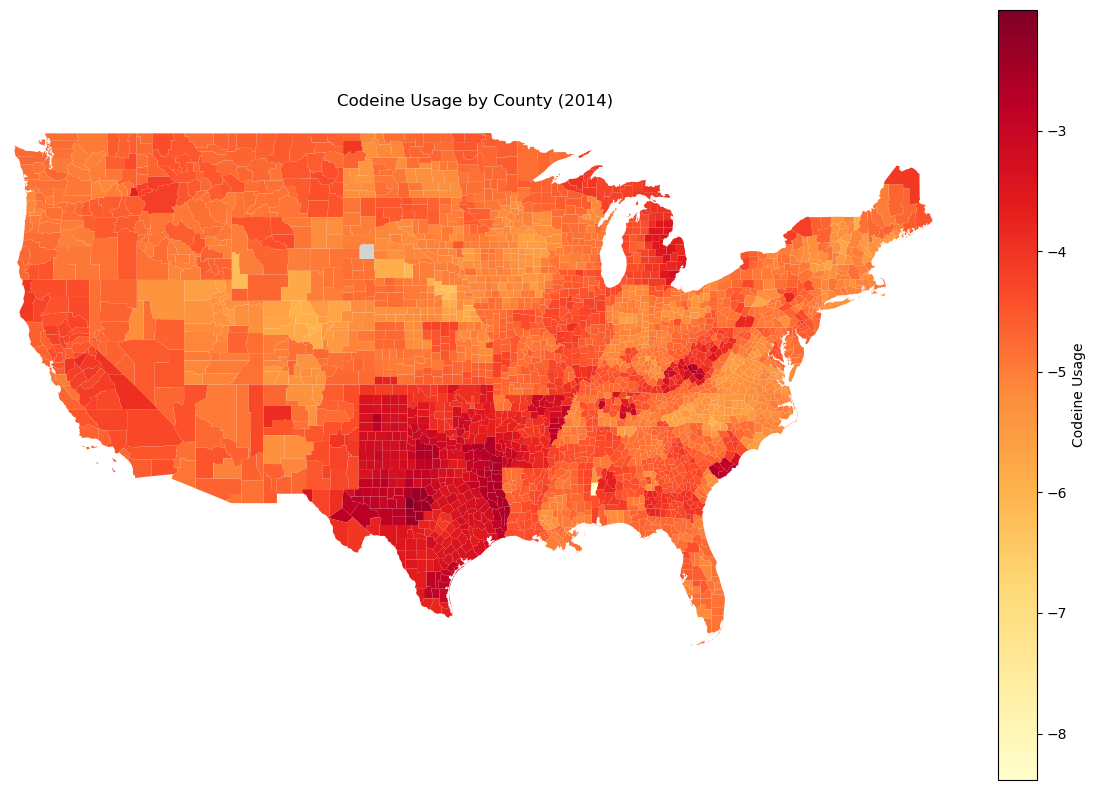

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

ORIGINAL_COL = "US_Codeine"
GRAPH_COL = "US_Codeine_Log"
df_drug[GRAPH_COL] = np.log(df_drug[ORIGINAL_COL])

# Create dataframe and process FIPS codes
cropped_df = df_drug[df_drug["Date"] == "2017-10"]


# Load US counties shapefile
counties = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
merged = counties.merge(cropped_df, how='left', left_on='id', right_on='FIPS')

# Create the plot
fig, ax = plt.subplots(1, figsize=(15, 10))

# Create choropleth map
merged.plot(
    column=GRAPH_COL,
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Codeine Usage'},
    missing_kwds={'color': 'lightgrey'},
    cmap='YlOrRd'
)

# Set the map boundaries to focus on continental US
ax.set_xlim([-125, -66.5])  # Longitude limits for continental US
ax.set_ylim([24, 49])      # Latitude limits for continental US

# Customize the map
plt.title('Codeine Usage by County (2014)', pad=20)
plt.axis('off')

# Show the plot
plt.show()

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Create output directory for maps if it doesn't exist
output_dir = Path('drug_maps')
output_dir.mkdir(exist_ok=True)

# Get sorted list of unique dates
dates = sorted(df_drug['Date'].unique())

# Find the global min and max for consistent color scale
global_min = df_drug[GRAPH_COL].min()
global_max = df_drug[GRAPH_COL].max()

# Load US counties shapefile (load once outside the loop for efficiency)
counties = gpd.read_file('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')

# Create a map for each date
for date in dates:
    # Create dataframe and process FIPS codes for this date
    cropped_df = df_drug[df_drug["Date"] == date]
    cropped_df['FIPS'] = cropped_df['placeDcid'].str.split('/').str[-1]
    
    # Merge with geographic data
    merged = counties.merge(cropped_df, how='left', left_on='id', right_on='FIPS')
    
    # Create the plot
    fig, ax = plt.subplots(1, figsize=(15, 10))
    
    # Create choropleth map
    merged.plot(
        column=GRAPH_COL,
        ax=ax,
        legend=True,
        legend_kwds={'label': 'Codeine Usage'},
        missing_kwds={'color': 'lightgrey'},
        cmap='YlOrRd',
        vmin=global_min,  # Set consistent color scale
        vmax=global_max
    )
    
    # Set the map boundaries to focus on continental US
    ax.set_xlim([-125, -66.5])
    ax.set_ylim([24, 49])
    
    # Customize the map
    plt.title(f'Codeine Usage by County ({date})', pad=20)
    plt.axis('off')
    
    # Save the plot
    filename = f'drug_maps/codeine_map_{date.replace("-", "_")}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()  # Close the figure to free memory

print(f"Created maps for {len(dates)} dates in the 'drug_maps' directory")


/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_594/275268326.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df['FIPS'] = cropped_df['placeDcid'].str.split('/').str[-1]
/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_594/275268326.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df['FIPS'] = cropped_df['placeDcid'].str.split('/').str[-1]
/var/folders/h6/sy6yc4qn7vg_qrvftw3gqnl00000gn/T/ipykernel_594/275268326.py:25: SettingWithCopyWarning: 
A value is trying t

Created maps for 48 dates in the 'drug_maps' directory


In [19]:

try:
    from PIL import Image
    import glob
    
    # Get list of saved images
    images = []
    files = sorted(glob.glob("drug_maps/codeine_map_*.png"))
    
    # Load all images
    for filename in files:
        images.append(Image.open(filename))
    
    # Save as GIF
    images[0].save(
        'drug_maps/codeine_usage_animation.gif',
        save_all=True,
        append_images=images[1:],
        duration=500,  # Duration for each frame in milliseconds
        loop=0
    )
    print("Created animation: drug_maps/codeine_usage_animation.gif")
except ImportError:
    print("PIL (Pillow) library not installed. Skipping GIF creation.")

Created animation: drug_maps/codeine_usage_animation.gif
